In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [15]:
# Load dataset
df = pd.read_csv('weatherHistory.csv')

# Convert date column
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.set_index('Formatted Date', inplace=True)

# Look at first rows
print(df.head())


                                 Summary Precip Type  Temperature (C)  \
Formatted Date                                                          
2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222   
2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   
2006-04-01 00:00:00+00:00  Mostly Cloudy        rain         9.377778   
2006-04-01 01:00:00+00:00  Partly Cloudy        rain         8.288889   
2006-04-01 02:00:00+00:00  Mostly Cloudy        rain         8.755556   

                           Apparent Temperature (C)  Humidity  \
Formatted Date                                                  
2006-03-31 22:00:00+00:00                  7.388889      0.89   
2006-03-31 23:00:00+00:00                  7.227778      0.86   
2006-04-01 00:00:00+00:00                  9.377778      0.89   
2006-04-01 01:00:00+00:00                  5.944444      0.83   
2006-04-01 02:00:00+00:00                  6.977778      0.83   

                           Wind 

In [16]:
# Resample hourly data into monthly averages
df_monthly = df[['Apparent Temperature (C)', 'Humidity']].resample('MS').mean()

# Drop missing values
df_monthly.dropna(inplace=True)


In [17]:
# Create lag features (past months)
df_monthly['Lag1'] = df_monthly['Apparent Temperature (C)'].shift(1)
df_monthly['Lag2'] = df_monthly['Apparent Temperature (C)'].shift(2)

# Remove rows with NaN after shift
df_monthly.dropna(inplace=True)


In [18]:
X = df_monthly[['Lag1', 'Lag2', 'Humidity']]  # Features
y = df_monthly['Apparent Temperature (C)']    # Target

# Keep chronological order (no shuffle for time-series)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [19]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:
# Predictions
y_pred = model.predict(X_test)

# Calculate error
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.3f}")


Test MSE: 5.929


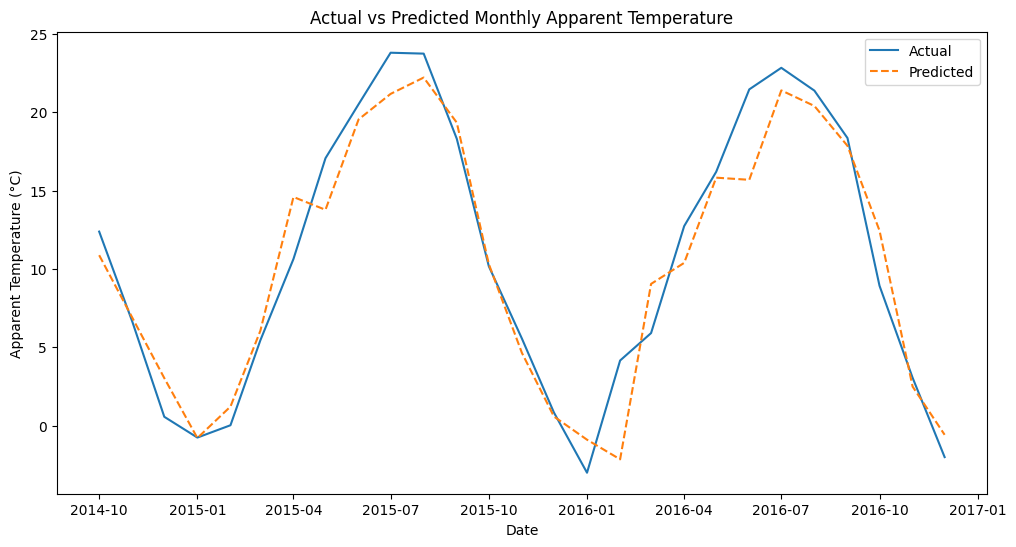

In [21]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Apparent Temperature (°C)')
plt.title('Actual vs Predicted Monthly Apparent Temperature')
plt.legend()
plt.show()
